# Project 2 - Churn - Analyzing the dataset

- Analyzing the dataset

- Course Name :         Applied Machine Learning
- Course instructor:    Sohail Tehranipour
- Student Name :        Afshin Masoudi Ashtiani
- Project 2 -           Churn
- Date :                September 2024
- File(ipynb) :         2/4

## Step 1: Install required libraries

In [ ]:
%pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


## Step 2: Import required libraries

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

## Step 3: Load the dataset

In [3]:
# Load dataset
# dataset_path = r'\content\drive\My Drive\Applied Machine Learning\Project 2 : Churn\datasets\cleaned_IT_customer_churn.csv'
dataset_path = r'C:\Users\Afshin\Desktop\10_Projects\Project_2_Churn\datasets\cleaned_IT_customer_churn.csv'

df = pd.read_csv(dataset_path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7010 entries, 0 to 7009
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   int64  
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   int64  
 3   Dependents        7010 non-null   int64  
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   int64  
 6   MultipleLines     7010 non-null   int64  
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   int64  
 9   OnlineBackup      7010 non-null   int64  
 10  DeviceProtection  7010 non-null   int64  
 11  TechSupport       7010 non-null   int64  
 12  StreamingTV       7010 non-null   int64  
 13  StreamingMovies   7010 non-null   int64  
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   int64  
 16  PaymentMethod     7010 non-null   object 


## Step 4: Analyze the dataset

### Info of The dataset 

In [4]:
features = df.columns.tolist()
print(f'> Number of features : {df.shape[1]}')
print(f'> Number of samples  : {df.shape[0]}')
print(f'> Name of target : {features[-1]}')
print(f'> Name of features :')
[print(feature, end=' ') for feature in features[:-1]]
df.describe()

> Number of features : 20
> Number of samples  : 7010
> Name of target : Churn
> Name of features :
gender SeniorCitizen Partner Dependents tenure PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod MonthlyCharges TotalCharges 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,0.504280,0.162767,0.484023,0.299429,32.520399,0.902996,0.423252,0.287447,0.345934,0.344936,0.291013,0.385592,0.389586,0.593153,64.888666,2290.353388,0.264907
std,0.500017,0.369180,0.499780,0.458041,24.520441,0.295985,0.494110,0.452604,0.475706,0.475381,0.454262,0.486770,0.487691,0.491281,30.064769,2266.820832,0.441315
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.750000,408.312500,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.400000,1403.875000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.900000,3807.837500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


### Analysis of Churn

- Percentage of Yes or No Churn

In [5]:
df.Churn.value_counts(normalize= True) * 100

Churn
0    73.509272
1    26.490728
Name: proportion, dtype: float64

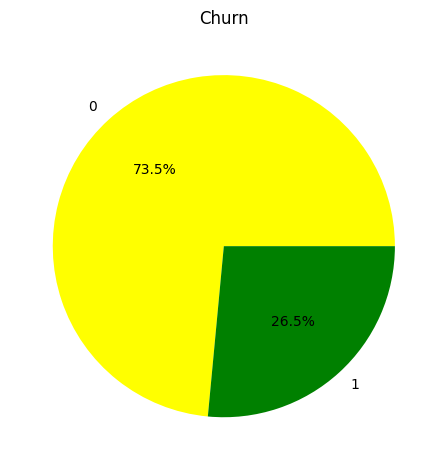

In [6]:
import matplotlib.pyplot as plt

labels = df.Churn.unique().tolist()
values = df.Churn.value_counts().tolist()

fig, ax = plt.subplots()
ax.pie(
    x=values, 
    labels=labels, 
    colors=["yellow", "green"],
    autopct='%1.1f%%')
plt.title('Churn')
plt.tight_layout()
plt.show()

- Customer Churn Prediction Visualization

In [7]:
def pie_chart(data, xlabel):
    plt.figure(figsize=(10, 5))
    plt.hist(data, rwidth=0.95, color=['green', 'red'], label=['Churn = No', 'Churn = Yes'])
    plt.title('Customer Churn Prediction Visualization')
    plt.xlabel(xlabel)
    plt.ylabel('Number of Customers')
    plt.legend()
    plt.tight_layout()
    plt.grid()
    plt.show()

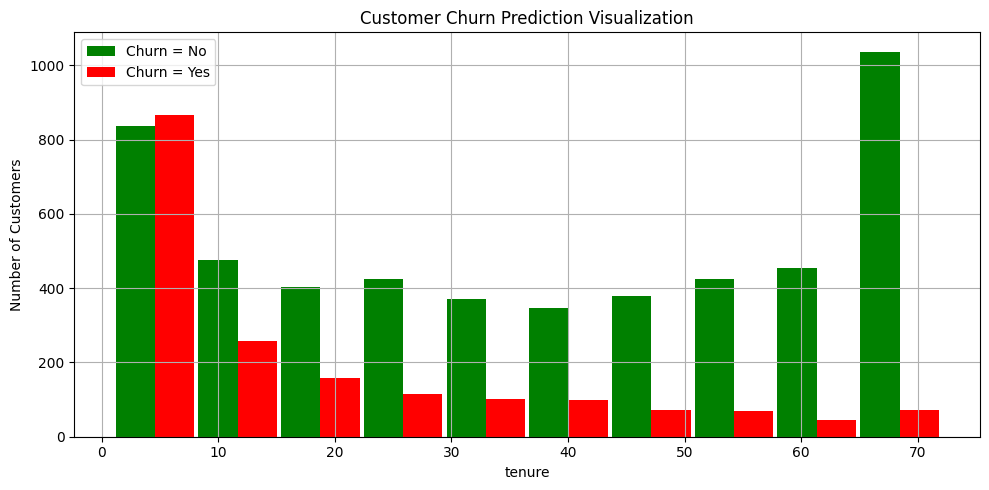

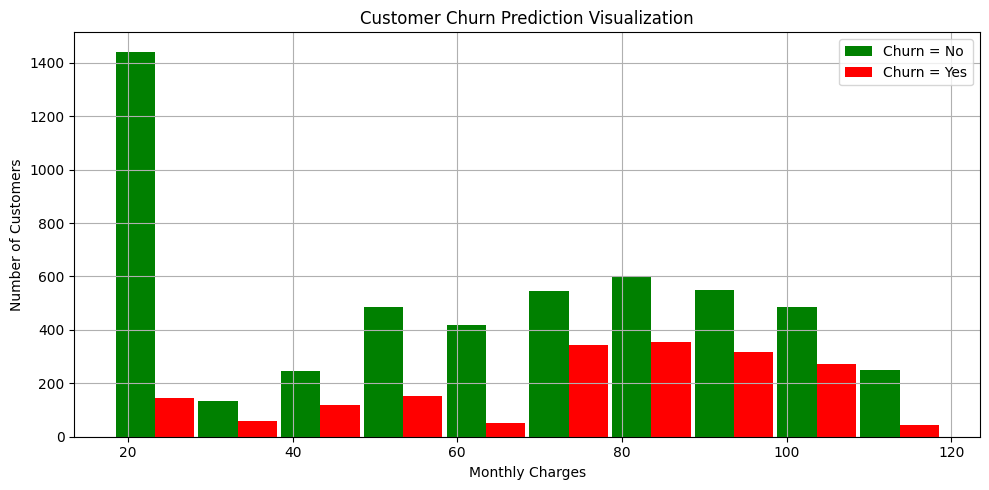

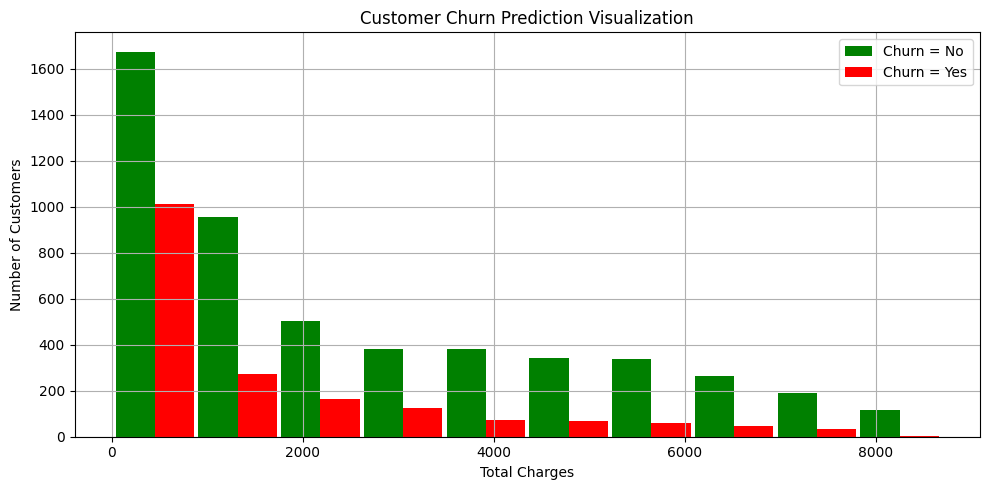

In [8]:
tenure_churn_no = df[df.Churn == 0].tenure
tenure_churn_yes = df[df.Churn == 1].tenure

mc_churn_no = df[df.Churn == 0].MonthlyCharges
mc_churn_yes = df[df.Churn == 1].MonthlyCharges

tc_churn_no = df[df.Churn == 0].TotalCharges
tc_churn_yes = df[df.Churn == 1].TotalCharges

pie_chart([tenure_churn_no, tenure_churn_yes], 'tenure')
pie_chart([mc_churn_no, mc_churn_yes], 'Monthly Charges')
pie_chart([tc_churn_no, tc_churn_yes], 'Total Charges')